# Image Generation with IONOS AI Model Hub

The IONOS AI Model Hub provides an OpenAI-compatible API that enables high-quality image generation using state-of-the-art foundation models. By inputting descriptive prompts, users can create detailed images directly through the API, without the need for managing underlying hardware or infrastructure.

## Supported Image Generation Models

The following models are currently available for image generation, each suited to different types of visual outputs:

| Model Provider | Model Name | Purpose |
|-----------------------------------------|---------------------------|---------------------------------------------------------------|
| stability.ai ([<mark style="color:blue;">**License**</mark>](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/blob/main/LICENSE.md)) | Stable Diffusion XL | Generates photorealistic images, ideal for marketing visuals, product mockups, and natural scenes. | 
| BlackForestLab ([<mark style="color:blue;">**License**</mark>](https://raw.githubusercontent.com/black-forest-labs/flux/refs/heads/main/model_licenses/LICENSE-FLUX1-schnell)) | FLUX.1-schnell | Generates artistic, stylized images, well-suited for creative projects, digital art, and unique concept designs. |

## Overview

In this tutorial, you will learn how to generate images using foundation models via the IONOS API. This tutorial is intended for developers with basic knowledge of:
- REST APIs
- A programming language for handling REST API endpoints (Python and Bash examples are provided)

By the end, you will be able to:
1. Retrieve a list of available image generation models in the IONOS AI Model Hub.
2. Use prompts to generate images with these models.

## Getting Started with Image Generation

To use image generation models, first set up your environment and authenticate using the OpenAI-compatible API endpoints.

## Prerequisite: Access API Token from environment variable

We strongly suggest that you save your IONOS API token as environment variable in your operating system. You can then access it using the following lines of code:

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()
IONOS_API_TOKEN = os.getenv('IONOS_API_TOKEN')

#### Step 1: Retrieve Available Models

Fetch a list of models to see which are available for your use case:

In [2]:
import requests

endpoint = "https://openai.inference.de-txl.ionos.com/v1/models"

header = {
    "Authorization": f"Bearer {IONOS_API_TOKEN}", 
    "Content-Type": "application/json"
}
requests.get(endpoint, headers=header).json()

{'data': [{'id': 'BAAI/bge-m3',
   'object': 'model',
   'created': 1677610602,
   'owned_by': 'openai'},
  {'id': 'mistralai/Mixtral-8x7B-Instruct-v0.1',
   'object': 'model',
   'created': 1677610602,
   'owned_by': 'openai'},
  {'id': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
   'object': 'model',
   'created': 1677610602,
   'owned_by': 'openai'},
  {'id': 'meta-llama/Meta-Llama-3.1-70B-Instruct',
   'object': 'model',
   'created': 1677610602,
   'owned_by': 'openai'},
  {'id': 'black-forest-labs/FLUX.1-schnell',
   'object': 'model',
   'created': 1677610602,
   'owned_by': 'openai'},
  {'id': 'meta-llama/Meta-Llama-3.1-405B-Instruct-FP8',
   'object': 'model',
   'created': 1677610602,
   'owned_by': 'openai'},
  {'id': 'stabilityai/stable-diffusion-xl-base-1.0',
   'object': 'model',
   'created': 1677610602,
   'owned_by': 'openai'},
  {'id': 'meta-llama/CodeLlama-13b-Instruct-hf',
   'object': 'model',
   'created': 1677610602,
   'owned_by': 'openai'},
  {'id': 'sentence-tran

This query returns a JSON document listing each model's name, which you’ll use to specify a model for image generation in later steps.

#### Step 2: Generate an Image with Your Prompt

To generate an image, send a prompt to the `/images/generations` endpoint. Customize parameters like `size` for the resolution of the output image.

In [3]:
import requests

MODEL_NAME = "black-forest-labs/FLUX.1-schnell"
PROMPT = "A futuristic cityscape at sunset, highly detailed"

endpoint = "https://openai.inference.de-txl.ionos.com/v1/images/generations"

header = {
    "Authorization": f"Bearer {IONOS_API_TOKEN}", 
    "Content-Type": "application/json"
}
body = {
    "model": MODEL_NAME,
    "prompt": PROMPT,
    "size": "1024x1024"
}
response = requests.post(endpoint, json=body, headers=header)
response.status_code

200

#### Step 3: Extract and Interpret the Result

The returned JSON includes several key fields, most importantly:
- **`data.[].b64_json`**: The generated image in base64 format.
- **`usage.prompt_tokens`**: Token count for the input prompt.
- **`usage.total_tokens`**: Token count for the entire process (usually zero for image generation, as billing is per image).

In [4]:
response.json()['usage']

{'prompt_tokens': 0, 'completion_tokens': 0, 'total_tokens': 0}

#### Step 4: Persist Image on Harddisk

In [5]:
from base64 import b64decode

FILENAME = 'ionos_generated_image.jpg'
with open(FILENAME, 'wb') as f:
    f.write(b64decode(response.json()['data'][0]['b64_json']))

#### Step 5: Display Image in Notebook

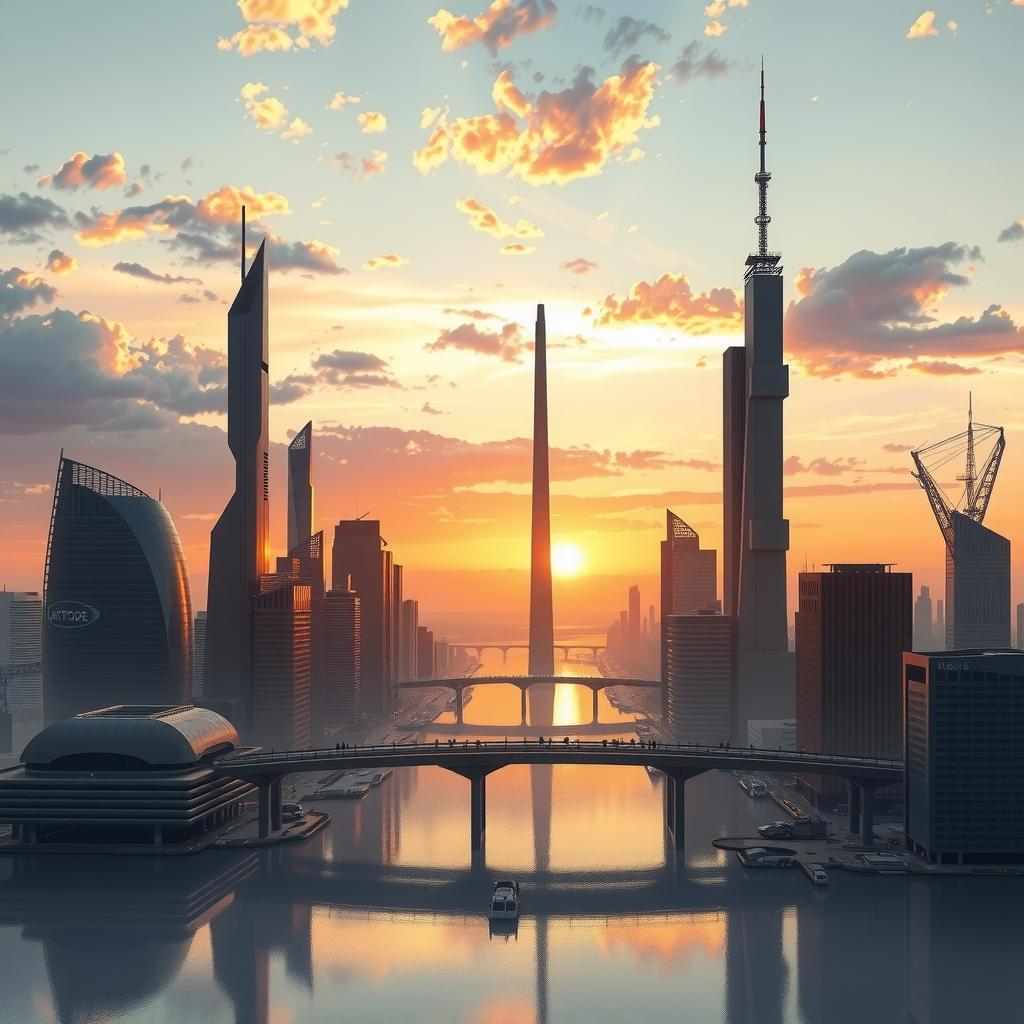

In [6]:
from IPython import display
from base64 import b64decode

display.Image(b64decode(response.json()['data'][0]['b64_json']))